In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 4.0 MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 

In [2]:
import time

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

url='https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'

# wd.close()

In [3]:
wd= webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get(url)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [4]:
# date_time=wd.find_elements_by_xpath("//a[@class='Permalink']/time")
# date_time=[i.text for i in date_time]

# msg_txt=wd.find_elements_by_xpath("//div[@class='Message userContent']")
# msg_txt=[i.text for i in msg_txt]

# pd.DataFrame({
#     'date_time':date_time,
#     'message':msg_txt
# })

In [5]:
pg_btn=wd.find_elements_by_xpath("//a[@aria-label='Next Page']")
pg_btn

btn_tbu=pg_btn[0]



In [6]:
def assemble_dt_messages(skip_first=False):
  date_time=wd.find_elements_by_xpath("//a[@class='Permalink']/time")
  date_time=[i.text for i in date_time]

  msg_txt=wd.find_elements_by_xpath("//div[@class='Message userContent']")
  msg_txt=[i.text for i in msg_txt]
  
  df=pd.DataFrame({
    'date_time':date_time,
    'message':msg_txt
                  })
  if skip_first:
    df=df.iloc[1:,:]
  return df


In [7]:
df_messages=assemble_dt_messages()
ct_cmnts=df_messages.shape[0]

min_num_words=5

pg_ct=1
while ct_cmnts<=5000:
  pg_btn=wd.find_elements_by_xpath("//a[@aria-label='Next Page']")
  pg_btn
  # time.sleep(1)

  btn_tbu=pg_btn[0]
  btn_tbu.click()
  # time.sleep(0.3)

  pg_ct+=1

  temp_df=assemble_dt_messages()

  temp_df=temp_df.loc[(temp_df.message.apply(lambda e: len(set(str(e).split(' '))))>min_num_words),]#we assert our comment to have at least these many, here 5, number of words


  df_messages=pd.concat([df_messages,temp_df])
  df_messages=df_messages.drop_duplicates(subset=['message'])#We will drop repetitive messages like 'lol', 'same here' and any other

  


  ct_cmnts=df_messages.shape[0]

  print(ct_cmnts)
  display(pd.concat([temp_df.head(3),df_messages.tail(2)]))

101


,date_time,message
0,April 2002,The problem is that they are HUGE generalizati...
1,April 2002,Have found out that with some of the more powe...
2,April 2002,How does your theory explain English cars? A c...
48,September 2002,kdshapiro - thanks for your post.\n\nI'm findi...
49,September 2002,"These are three pretty different cars, so it r..."


147


,date_time,message
0,September 2002,Does anyone find that the TL has extrememly bo...
1,September 2002,The TL-S does have boring styling and white is...
4,September 2002,Wow...that guy in the news clip really does lo...
48,September 2002,I honestly cannot remember a car I've been in ...
49,September 2002,"""they DOUBLE their rigidity with EVERY platfor..."


195


,date_time,message
0,September 2002,"Yes, my X-TYPE also has a seatbelt warning lig..."
1,October 2002,While the C-Class did gain an extra star becau...
2,October 2002,Speaking of Mercedes and safety. I think this ...
48,September 2003,I've been really pleased with the A4 with Quat...
49,September 2003,"I had many problems with my G35 sedan, but the..."


243


,date_time,message
0,September 2003,"Post your message on the Infiniti board, let b..."
1,September 2003,billyperks - he did - several of them.
2,October 2003,"""there are too many of them and I feel that th..."
48,January 2004,"Not knocking Acura or CR, but JD Powers websit..."
49,January 2004,"""Consumer Reports is THE most respected public..."


291


,date_time,message
0,January 2004,"Wellll, that is your opinion, of course. Other..."
1,January 2004,Any auto reviewer that can state 530i is the b...
2,January 2004,"Yep, hear ya.\n\nBut that vehicle probably doe..."
48,January 2004,I saw the arguments about the TL and the 330. ...
49,January 2004,"""At this year's 2004 Los Angeles Auto Show, Ac..."


341


,date_time,message
0,January 2004,braking - sorry the 70 to 0 braking of 189 rep...
1,January 2004,A new 2004 Accord drove up into my driveway la...
2,January 2004,"For those who love numbers, compare performanc..."
48,January 2004,"yes, if you take the worst handling FWD cars a..."
49,January 2004,"Ok, kd. Time to retire the Hyundai bit, like I..."


391


,date_time,message
0,January 2004,"hello everyone, I test drove both a Honda acco..."
1,January 2004,I dont understand why is that Saab does not co...
2,January 2004,pp...it was written tongue in cheek...forgot t...
48,January 2004,So you have a car that doesn't handle nearly a...
49,January 2004,"""Are you kidding?! Most of us are stuck in tra..."


438


,date_time,message
0,January 2004,"Is that Blue Mountain ski resort, just north o..."
1,January 2004,"""Are you kidding?! Most of us are stuck in tra..."
2,January 2004,Yes it is. Not much but they open at 7:30 on w...
48,January 2004,The Ultimate Argument does not hold water. Per...
49,January 2004,"At work there is a nice G35 with 18"" wheels, l..."


485


,date_time,message
0,January 2004,The Legacy GT is another one I'm looking forwa...
1,January 2004,"""You G35, TL & IS300 worshipers are gonna be u..."
2,January 2004,If you review the few mag articles that relate...
48,January 2004,"""What a rhetorical question... Of course, it's..."
49,January 2004,"I'm hoping to be old, rich, healthy, driving a..."


534


,date_time,message
0,January 2004,Don't you think people see their car as projec...
1,January 2004,I dont know about that...we just all want the ...
2,January 2004,"""way more than we are paying for entry lux sed..."
48,January 2004,It is my belief that the average driver can ge...
49,January 2004,I actually agree with you in the light HP duty...


583


,date_time,message
0,January 2004,"""The bottom line for me is that I think you ca..."
1,January 2004,The main point of my post was to emphasize tha...
2,January 2004,chris - my take is that you would be very eage...
48,January 2004,whatever comp you want KD I'll feel pretty goo...
49,January 2004,"""You want to bring the 2 doors into it feel fr..."


631


,date_time,message
0,January 2004,I didn't bring it into the mix - the thoroughl...
1,January 2004,I was just chatting with some old 5 series own...
2,January 2004,"""Present value of 300 a month for 48 months at..."
47,January 2004,"""It's hard for me to see prestige when I see m..."
48,January 2004,"""Granted, a car writer's opinion carries a lot..."


680


,date_time,message
0,January 2004,"I've driven a Passat and own an A4, and they d..."
1,January 2004,Drive a passat isn't like driving an A4. Same ...
2,January 2004,qbrozen... I buy what I love. I might like oth...
48,February 2004,Pretty darn good. If they're willing to change...
49,February 2004,BMW completed one if it's best years ever. So ...


728


,date_time,message
0,February 2004,"""I dont even know why 800k people chosed Accor..."
1,February 2004,"To get the most out of a 325i or 330i, you hav..."
2,February 2004,As much as some BMW owners on this board like ...
48,February 2004,"So the entire 5-series gets top honors, but th..."
49,February 2004,"I read this from another forum:\n\n""You just n..."


776


,date_time,message
0,February 2004,CLS? Acura CL Type S? That can't be it as the ...
2,February 2004,"Story is titled ""Hobson's Choice: Value versus..."
3,February 2004,I couldn't convince anyone I've helped buy a c...
48,February 2004,Audi and BMW make it hard to compete in the co...
49,February 2004,Audi? rofl. Audi's A4 Cab is a joke. It's stra...


826


,date_time,message
0,February 2004,The Audi is probably cross shopped by 3cic buy...
1,February 2004,"The A4 Cab is a beautiful car, and it is more ..."
2,February 2004,BTW...I would hardly call the upcoming S4 Cabr...
48,February 2004,"I said BMW's rep rests on style, performance, ..."
49,February 2004,"...notwithstanding the actual lexus dynamics, ..."


874


,date_time,message
0,February 2004,"Blue,\n\nNobody said VW doesn't have quality i..."
1,February 2004,"""I said BMW's rep rests on style, performance,..."
2,February 2004,meanwhile the 5 series got worse and costs mor...
47,February 2004,did your friend really pay you?
48,February 2004,She is sitting beside me as I am typing. We de...


924


,date_time,message
0,February 2004,I believe all sport-sedan lovers are latent sp...
1,February 2004,I have been staying out of here for awhile but...
2,February 2004,Great post raher!\n\nBottom Line... We old goa...
48,February 2004,There are plenty of differences between the 32...
49,February 2004,95gt\n\nI got a loaded A4 1.8T frontrack for j...


972


,date_time,message
0,February 2004,blueguydotcom... The primary point of the quot...
1,February 2004,"So far you've said nothing to justify the $7,1..."
2,February 2004,"As for what's a rip off, and what&#146;s an in..."
48,March 2004,That's the weird thing. Bimmers are ubiquitous...
49,March 2004,The m3 and zhp pakages look pretty tuff - they...


1022


,date_time,message
0,March 2004,"Chris\n\nYeah, S. Florida drivers are truly a ..."
1,March 2004,I loved the old 3.0 VQ. I'm not real moved by ...
2,March 2004,Coming in to LA on the 101 is like riding on t...
48,March 2004,Check out p. 9 of the 3/8/04 issue of AutoWeek...
49,March 2004,"Jrock is right, there is no clear cut winner i..."


1072


,date_time,message
0,March 2004,"Sorry,I have to add\n\nReliability, resale val..."
1,March 2004,You've completely missed my point sales indica...
2,March 2004,"It does to me bcuz if I dont care about them, ..."
48,March 2004,"The rather high cost of the ZHP, A-spec, and L..."
49,March 2004,My biggest concern with the packages is that t...


1121


,date_time,message
0,March 2004,Do it yourself and dont pay someone to make mo...
1,March 2004,"I am of two minds on this one. In most cases, ..."
2,March 2004,Another funny thing about the 330i to ZHP swit...
48,March 2004,"""I admit a severe distate for American styling..."
49,March 2004,"""Golly, if a guy in a magazine - you know the ..."


1168


,date_time,message
0,March 2004,I don't care for American car's either. Save f...
2,March 2004,I can honestly say I don't care where my car c...
3,March 2004,Cookie jar still not full. Blueguy: what's you...
48,March 2004,As long as as car companies in this country ea...
49,March 2004,"Chris - ""Blueguy doesn't want auto employees t..."


1216


,date_time,message
0,March 2004,IMO I dont care who or which country that make...
1,March 2004,However when you say I want an American Car co...
3,March 2004,The Spielberg movie always use Ford Vans for t...
47,March 2004,"First of all, let me say I think the 530i is o..."
49,March 2004,"well, I won't speak for everyone, but I'm not ..."


1266


,date_time,message
0,March 2004,too right...too funny...but too right.\n\nI ha...
1,March 2004,All of the numbers that have been posted here ...
2,March 2004,LOL. I agree. Actually what drives me nuts are...
48,March 2004,If you throw STi out of here then boot G35 als...
49,March 2004,"The WRX certainly has enough ""performance"", bu..."


1314


,date_time,message
0,March 2004,Think you are going way overboard there. The S...
1,March 2004,A loaded WRX might just barely get near the ta...
2,March 2004,"""True, cadillac has come a long way in quality..."
48,March 2004,Do you agree or not?\n\nLuxury - Real Wood/Alu...
49,March 2004,"Since we're still on the subject, I wouldn't a..."


1364


,date_time,message
0,March 2004,It's funny how my '03 Maxima SE has more luxur...
1,March 2004,Do not agree. It's the placement of the vehicl...
2,March 2004,Infiniti is a brand that has shot up these las...
48,March 2004,Between the TL and 3series. It depends on your...
49,March 2004,"i haven't driven one yet, but by all accounts ..."


1411


,date_time,message
0,March 2004,S60R would probably outperform any car on the ...
1,March 2004,I find it quite amusing that for 5 pages or so...
2,March 2004,"I said it before, and I'll say it again, i rea..."
48,March 2004,Also some race track certainly favor FWD cars ...
49,March 2004,"Understeer and oversteer are both a ""loss of c..."


1460


,date_time,message
0,March 2004,My bias for RWD comes from that ethereal shove...
1,March 2004,"""Yes, it may be fun to play with throttle indu..."
2,March 2004,...my TL shoving me back in my seat when I acc...
48,March 2004,Let that also inlcude demo sports cars/sport s...
49,March 2004,fedlawman... Torque steer is problematic with ...


1510


,date_time,message
0,March 2004,"If new RL is AWD, as in rumored, then it could..."
1,March 2004,I don't understand why Acura has never offered...
2,March 2004,I'm not sure why they haven't switched yet eit...
48,March 2004,"Actually, Car and Driver and I see eye to eye ..."
49,March 2004,You keep that TSX engine perculating and it's ...


1559


,date_time,message
0,March 2004,"fedlawman... You wrote, ""the general consensus..."
1,March 2004,I don't the the A4 1.8T is slow at all. For a ...
2,March 2004,"""Comparing it to or an I6 or a V6 is unfair.""\..."
48,April 2004,Not sure what relevancy sales data has toward ...
49,April 2004,"Don't write them off yet. Infiniti, BMW and Au..."


1608


,date_time,message
0,April 2004,I read these boards hoping to gain useful know...
1,April 2004,Good point about sales. I'll just toss in FWIW...
2,April 2004,Where are you pulling your numbers from?
48,April 2004,I think the G35 overall is very close to the T...
49,April 2004,You're not very good at research...a simple vi...


1658


,date_time,message
0,April 2004,"You are wrong blueguydotcom, I said 15k unit i..."
1,April 2004,Danny\n\nSorry for being a little too personal...
2,April 2004,I fully agree if you classify the TL as an ave...
48,April 2004,"you add things like the premium package, nav s..."
49,April 2004,folks also put chains on their tires.\n\ndon't...


1705


,date_time,message
0,April 2004,My TL is fitted with Brembos.\n\nAcura TL\n60-...
1,April 2004,Me thinks that 60-0 is a little easier on the ...
2,April 2004,I've done that a few times. Like I said...no w...
48,April 2004,Impartiality definitely isn't the long suit in...
49,April 2004,Ok my G has some issues with a rattle in the r...


1751


,date_time,message
0,April 2004,Great posts. This could be a very productive c...
1,April 2004,So what are you saying about the last 93 pages...
2,April 2004,"""What did Acura find out?\n\nThat their bank a..."
48,April 2004,"With all the hype of A6/M/RL/GS/STS, I think i..."
49,April 2004,Thanks! Is your coupe auto or manaul and which...


1801


,date_time,message
0,April 2004,Agreed on the appearance. I've seen the new A6...
1,April 2004,"Dear Forum, I never thought this would happen ..."
2,April 2004,"Although derivative, I'd rather take the M45. ..."
48,April 2004,Just wanted to add my .02...I took the CTS for...
49,April 2004,"Regardless, the [cts] was much too soft and un..."


1851


,date_time,message
0,April 2004,Overpriced in your eyes - which is all that ma...
1,April 2004,I agree with sawyerjon on the performance of t...
2,April 2004,PS i dont have the stripper either so i know w...
48,April 2004,Sort of the exact opposite of the R&T article.
49,April 2004,Don't read the magazines and then quote them h...


1900


,date_time,message
0,April 2004,"""Say what? My 35 series tires on my 330i traml..."
1,April 2004,kahunah... There is a huge difference between ...
2,April 2004,Does you ZHP have a staggered setup? I've been...
48,April 2004,Not sure why that is happening in your neck of...
49,April 2004,Do they still use film and then manually apply...


1949


,date_time,message
0,April 2004,place I plan to get it tinted from comes with ...
1,April 2004,Finally got to drive a G35x today (nearest dea...
2,April 2004,I had a '99 328i for just over five years and ...
48,April 2004,""".D. Power and Associates, a marketing and res..."
49,April 2004,"possible, yes. probably, no.\n\ni would say it..."


1997


,date_time,message
0,April 2004,i remember toyota. honda and datsun from the e...
1,April 2004,Check out jdpowers.com for initial quality rat...
2,April 2004,out of 37 nameplates :\n\nlexus 1st\ninfinity ...
48,May 2004,"Maybe in Omaha, NE the IS 300 is not common. H..."
49,May 2004,One also might question if less hp is worth th...


2047


,date_time,message
0,May 2004,"According to our host Pat and all magazines, t..."
1,May 2004,Would be interesting to see the demographic br...
2,May 2004,Orange County is teeming with IS300s driven by...
48,May 2004,This is just rumor gleaned from following othe...
49,May 2004,Thanks for the info. Wife has announced she wa...


2096


,date_time,message
0,May 2004,"From the spy shots I've seen, you can see the ..."
1,May 2004,From these spyshots it doesn't look half bad. ...
2,May 2004,I like it... but you never know how true those...
48,May 2004,The looks of the WRX don't bother me that much...
49,May 2004,"What bothers me about the WRX, Evo, even the I..."


2146


,date_time,message
0,May 2004,"""I am in my mid 30's with young kids, and I ha..."
1,May 2004,"Oh, I plan to have a big crisis. Once the kids..."
2,May 2004,"I am there right now, got myself a 330ci coupe..."
48,May 2004,1) There is no possible way a dealer will attr...
49,May 2004,"""What do you think better/more air does to you..."


2196


,date_time,message
0,May 2004,I wont try and convince you but i wont let oth...
1,May 2004,"""There's a weird thing going in the above sent..."
2,May 2004,"""I wont try and convince you but i wont let ot..."
48,June 2004,Thanks for the responses. I'm definitely not t...
49,June 2004,I can't complain about my ZHP. When I get home...


2245


,date_time,message
0,June 2004,"I quoted the 330i,G35coupe with my Insurance A..."
1,June 2004,When I was shopping for my 530i a couple of ye...
2,June 2004,Yeah.. that seems strange.. My '03 325i is onl...
48,June 2004,"""The stealth look personified is the Cadillac ..."
49,June 2004,"""I think you prove my point. Once hyundia got ..."


2293


,date_time,message
0,June 2004,Bold styling can be an advantage or a curse. T...
1,June 2004,Do you want to turn heads merely because of lo...
2,June 2004,Am I the only one that hates that styling? The...
48,June 2004,"I don't talk about exterior aesthetics much, s..."
49,June 2004,Interesting visuals about the 300C! I think so...


2339


,date_time,message
0,June 2004,"300C nice, TL ugly.\n\nI have always felt that..."
1,June 2004,"""I don't talk about exterior aesthetics much, ..."
2,June 2004,I have always felt that European cars protect ...
47,June 2004,"Jeez what a shock. And let me guess, Rebel Wit..."
49,June 2004,Tasdisr...\nThese are the exact 2 cars I compa...


2389


,date_time,message
0,June 2004,That ahem was funny. I had a feeling we'd be s...
1,June 2004,"I might be from Mars, but I like to vacation i..."
2,June 2004,Latest stuff floating around BMW concerns the ...
48,June 2004,You ain't gonna convince kd with such stats. H...
49,June 2004,BMW is tops in a number of different ownership...


2439


,date_time,message
0,June 2004,"""Refuse to admit reality.""\n\nWhat reality are..."
1,June 2004,"Even if it's one more trip, that's totally una..."
2,June 2004,"""Even if it's one more trip, that's totally un..."
48,July 2004,Nissans AWD system and thier CVT seem light ye...
49,July 2004,I dont think your 1.8T cvt stand any chance ag...


2489


,date_time,message
0,July 2004,4-door: I'm not cool\nSport pkg: I'm cool\nste...
1,July 2004,"Chris,\n\nCVT is sooo smooth. No abrupt jerks ..."
2,July 2004,"Actually, the BMW is FAR better in traffic. Pu..."
48,July 2004,Take a look of the Acura TL A-spec concept. 30...
49,July 2004,Heres another example of wasting 6 grand


2538


,date_time,message
0,July 2004,I own a G35x and the gas mileage is one of my ...
1,July 2004,"...but matched with Nissan's gearing, man does..."
2,July 2004,The non awd gets about 22 until broken in then...
48,July 2004,No not sure that's why I used 4 in my denomina...
49,July 2004,Alright... all you young whippersnappers... ea...


2587


,date_time,message
0,July 2004,The coupe is a pretty noisy car though. For a ...
1,July 2004,Not sure about you but last time I heard the V...
2,July 2004,The G35 coupe should be noisy because it is a ...
48,August 2004,Get the C32 AMG-my friend has one and it has s...
49,August 2004,From anecdotal evidence I would say the BMW wi...


2636


,date_time,message
0,August 2004,"I purchased a 2002 C320 in December 2003, and ..."
1,August 2004,Thanks for all the great feedback! I just keep...
2,August 2004,The more systems a things has the more potenti...
48,August 2004,Has anybody driven or purchased the new C55 ye...
49,August 2004,Drive a C430.. Figure the C55 will ride a litt...


2683


,date_time,message
1,August 2004,"I've owned several BMW's, mostly 3 Series, mos..."
2,August 2004,Is there such a car as a C430?\nIs that in the...
3,August 2004,There is no such car as a C430. If you are tal...
48,August 2004,"I understand your point, but this topic is tit..."
49,August 2004,Anybody want to talk about the vehicles in the...


2730


,date_time,message
1,August 2004,"""this topic is titled Entry Level Performance ..."
2,August 2004,Why is there even a debate about this?\n\nWhet...
3,August 2004,"thematrixhasu, please send me an email, thanks."
48,November 2004,riez - disagree combined 3 series is 8714. See...
49,November 2004,"""Interestingly, the more luxury-oriented, less..."


2780


,date_time,message
0,November 2004,"kd,\nThat 8714 number includes more than B3 se..."
1,November 2004,I hope this is resolved really soon! I need to...
2,November 2004,"lol, good old kd, dont forget the wagon\nyou s..."
48,November 2004,"In most metropolitan areas, traffic keeps gett..."
49,November 2004,&#147;But definitely having a performance car ...


2830


,date_time,message
0,November 2004,The key in every purchase for me is one questi...
1,November 2004,You can't underestimate the p***y magnet facto...
2,November 2004,Thank you jrock65 for the valuable information...
48,November 2004,Well.. I was trying to show there is a big dif...
49,November 2004,Everything I've heard so far says that the int...


2877


,date_time,message
0,November 2004,Dealer did mention that 2005 6MT has to be ord...
1,November 2004,Interesting result. I expected Volvo and Saab ...
2,November 2004,Interesting. Considering I know someone who ha...
48,December 2004,"Wow no wonder Acura is concerned about sales, ..."
49,December 2004,There are actually 13 in the city.\n\n \n\nUnf...


2926


,date_time,message
0,December 2004,"""Unfortunately #13 never shows up at our meets..."
1,December 2004,The only reason I ever visit my Acura shop is ...
2,December 2004,isn't this special?\n\n \n\nIn five years' tim...
48,January 2005,sadly uninsured-underinsured coverage isnt man...
49,January 2005,TL 7211 units |Total sold in 2004 : 77895\n\nE...


2973


,date_time,message
0,January 2005,"Total 3 Series all models Dec: 10,569\n\nTotal..."
1,January 2005,I am admittedly an Acura fan (although I own n...
4,January 2005,Is CTS 3.6 the top selling single model of RWD...
48,January 2005,...can fit on the head of a pin? Let's argue a...
49,January 2005,"""An Acura TL finished 1st in class, and 3rd ov..."


3023


,date_time,message
0,January 2005,"yeah, that's great. but you really daned aroun..."
1,January 2005,"""How bout taking another look at the top of th..."
2,January 2005,"""Did they let them drive those cars home?""\n\n..."
48,February 2005,Pretty sure the answer is no..\n\nUnfortunatel...
49,February 2005,The 9-3 linear uses regular gas. It's not part...


3071


,date_time,message
0,February 2005,The CTS runs on 87 octane.
1,February 2005,"Dear Sylvia,\n\nWith Automobile magazine recen..."
2,February 2005,Stability control is not available on the Lega...
48,March 2005,I guess I can't post a link but it's in the au...
49,March 2005,"Um, there's no reason why you can't post a lin..."


3119


,date_time,message
1,March 2005,"that may cover the tires, but what about the w..."
2,March 2005,"Yes, winters, steel wheels, hubcaps, $500 or s..."
3,March 2005,BMWs are much more economical to lease because...
48,March 2005,"I do the same. I price cars there, and waste m..."
49,March 2005,are Edmund's #s generally low or high? Are you...


3168


,date_time,message
0,March 2005,tends to be wrong on the invoice/msrp pricing....
1,March 2005,"""There is already a trend toward the sequentia..."
2,March 2005,"carsdirect shows 38,423 with luxury sport pack..."
48,April 2005,Did I mention the Scoobies all come standard w...
49,April 2005,Remember the econ 101 concept of marginal util...


3217


,date_time,message
0,April 2005,I'm off to see the new 3-Series at Soldier Fie...
1,April 2005,designman - In terms of handling the only car ...
2,April 2005,Bumpy roads and sport suspensions are like oil...
48,May 2005,I have gone around corners many of times at hi...
49,May 2005,I have gone around corners many of times at hi...


3266


,date_time,message
0,May 2005,I appreciate your assessment. I have a TL and ...
1,May 2005,"I test drove the 05TL, 05 G35 and 05 3 series...."
2,May 2005,...it is a very good value and I felt that it ...
48,May 2005,"""I thought the ride in the TL was much too sof..."
49,May 2005,"Very well put ljwalters1. However, the TL is a..."


3316


,date_time,message
0,May 2005,The S4 Cab is a great looking car. Best of luc...
1,May 2005,Great post again Byron! I can't justify the pr...
2,May 2005,...I am totally in love with the G35 coupe. Oh...
48,June 2005,G35: 19/26\n330i: 19/27\nCTS: 17/27\n\nSo it d...
49,June 2005,"Not sure about where you live, but here in the..."


3364


,date_time,message
0,June 2005,I wonder if there really is a way to find car ...
1,June 2005,EPA gas mileage estimate testing are out of da...
2,June 2005,Ever notice why the ratings for all cars are s...
48,June 2005,This isn't the way it operates. Read the threa...
49,June 2005,"The ""keyless"" system in the new 3 sounds a bit..."


3414


,date_time,message
0,June 2005,"In my search for a new car, I am truely amazed..."
1,June 2005,"I strongly agree with you, especially when you..."
2,June 2005,So the standard system requires you to insert ...
48,June 2005,Came close to buying 06 325i but went with a r...
49,June 2005,I wish i would have been there.\nJust like eve...


3461


,date_time,message
0,June 2005,"""I was somewhat steered by the fact that it se..."
1,June 2005,"Any body have an input on their experience, es..."
2,June 2005,"""I really don’t care if a TL or a G35 is a ""be..."
48,June 2005,""" The 0-60 time of an E90 with a manual transm..."
49,June 2005,Wow are you ever wrong about that. The percept...


3506


,date_time,message
0,June 2005,"""Never have a I met a non BMW/Audi/Lexus/MB pe..."
1,June 2005,".02 alert.\nI dunno, I wanted a sporty rear-dr..."
2,June 2005,maybe you asked the wrong question?
48,June 2005,Well.. maybe that is because you are wrong!!\n...
49,June 2005,have you been talking to my wife?


3555


,date_time,message
0,June 2005,Sign up on the BMW web site or call the phone ...
1,June 2005,Did BMW X3 a couple of years ago at Belmont NY...
2,June 2005,Can&#146;t yet compare pre-iDrive BMW reliabil...
48,June 2005,"Obviously you have never owned a 77 Breakdown,..."
49,June 2005,I think I repleyed to the wrong person blueguy...


3601


,date_time,message
0,June 2005,I was confused by your post to me...no big deal.
1,June 2005,"CR is a good source, but it has to be taken a ..."
2,June 2005,The people that respond to CR surveys are subs...
48,July 2005,"""Entry level"" is really a term made up by mark..."
49,July 2005,"""Entry level"" as a marketing ploy, yeah, never..."


3650


,date_time,message
0,July 2005,Entry level is a market segment. If manufactur...
1,July 2005,So where does the 1 series fit in ?
3,July 2005,"""entry level"" or ""near luxury"".... i think i p..."
48,July 2005,"Excuse my ignorence, but is the Miata a FWD or..."
49,July 2005,"hmm, it's only been out for over 15 years. RWD."


3700


,date_time,message
0,July 2005,"Like I said excuse my iignorence, plus it's a ..."
1,July 2005,Thank you so much for everyone's responses. I ...
2,July 2005,no there wasn't. If yu look up the '05 TL revi...
48,July 2005,So in conclusion a standard suspension g35 wil...
49,July 2005,Well.. I'm offended that you've referred to my...


3749


,date_time,message
0,July 2005,So you're saying then a Crown Victoria must be...
1,July 2005,"""Acura TL - 0.87g, 65.8 mph\nG35 - 0.86g, 65.0..."
2,July 2005,"""vehicle utility""\n\nYour definition of vehicl..."
48,July 2005,Is the Pantheon as fast as the BMW M3? :P
49,July 2005,I think the best sportscar you can get with $5...


3798


,date_time,message
0,July 2005,I love the TLs styling. I look at it from the ...
1,July 2005,I would be concerned about the vette's reliabi...
2,July 2005,Cant agree more!\n\nTaxesquire : they made up ...
48,August 2005,For people in the habit of thinking about SAE ...
49,August 2005,"For the 2006 model year, all Acura horsepower ..."


3846


,date_time,message
0,August 2005,I'm also thinking of switching from a Passat t...
1,August 2005,"I love my TL, and I never regret switching fro..."
2,August 2005,"Wow, they've done a nice job leapfrogging the ..."
48,August 2005,"""A car that sporty with no MT??? That's strang..."
49,August 2005,INFINITI and BMW have made great cars along wi...


3896


,date_time,message
0,August 2005,"""The coupes have too much chassis flex. ""\n\nI..."
1,August 2005,"""If the IS350 loaded costs 30k,""\n\nIt wont. T..."
2,August 2005,Hey I also agree about the price... If you hea...
48,August 2005,Um... face the 6-SPD Infin will blow the doors...
49,August 2005,"kd, no comparo ever has timed a 330 quicker to..."


3944


,date_time,message
0,August 2005,"again, a V6 accord stick would out gun any 325..."
1,August 2005,"the Bimmers are not just about 0-60 numbers, m..."
2,August 2005,Wow really I never knew that the V6 Accord Cou...
48,August 2005,Yes the new engine 268 hp V-6 right ? Sounds g...
49,August 2005,I got a complimentary Dodge Neon from the 90's...


3993


,date_time,message
0,August 2005,"Don't get me wrong, I did like the G, I just g..."
1,August 2005,Well then I must be a special customer because...
2,August 2005,Yes they are treating me good ! I just ordered...
48,August 2005,"hey blueguy, my 330i will arrive at the dealer..."
49,August 2005,German cars can only hope to be as good as a G...


4043


,date_time,message
0,August 2005,Yeah to bad it doesn't handle as good and goob...
1,August 2005,"The G35 coupe does handle as good as the BMW, ..."
2,August 2005,Actually it doesn't wipe out anything. HP is n...
48,August 2005,Of course I can think what I want. No need for...
49,August 2005,Here is what I wrote:\n\n2005 G35 auto: 15-18/...


4089


,date_time,message
0,August 2005,That's what I'm saying. To use as a comparison...
1,August 2005,The problem with the EPA it is not real world....
2,August 2005,"""i can get employee pricing on a G35...and my ..."
47,August 2005,"OAC, you gotta ask yourself, how did a slower ..."
49,August 2005,"""The IS brings a total package to the table.""\..."


4137


,date_time,message
0,August 2005,There must be a lot of denial going on around ...
1,August 2005,"you gotta ask yourself, how did a slower car t..."
2,August 2005,"Don't look now, but the ""total package"" is mis..."
48,August 2005,"As for trannies, the DSG's got it all over BMW..."
49,August 2005,states that while they really like the car ove...


4186


,date_time,message
0,August 2005,I still have fantasies about owning honda's si...
1,August 2005,"OK, how about a Lotus Elise? Well over $30K an..."
2,August 2005,"In this review, the IS350 got a 0-60 time of 6..."
48,September 2005,Uh... I owned a 3-speed... How old does that m...
49,September 2005,"Extending this off-topic - Had a ""Used"" 53 For..."


4236


,date_time,message
0,September 2005,that there are people on here even older than ...
1,September 2005,It's better than the alternative!\n\nJust fini...
2,September 2005,Your posts are great laurasdada :P\n\nI learne...
48,September 2005,Check this out.\n\nhttp://www.consumerreports....
49,September 2005,Well thanks for the clarification about this t...


4286


,date_time,message
0,September 2005,The only issue I have with this apparently ter...
1,September 2005,"I mean, if the A3 fits your needs, then why no..."
2,September 2005,http://www.auto-motor-und-sport.de/d/88304\n\n...
48,September 2005,Not sure... they mention their methodology and...
49,September 2005,The great thing about magazines and the intern...


4335


,date_time,message
0,September 2005,"That's why I rely on CR, a non-profit, who I b..."
1,September 2005,"They do, but their evaluations have not meshed..."
2,September 2005,Depends upon what your criteria are. CR doesn'...
48,September 2005,"Good luck? Hmmm, I'm thinking that it is more ..."
49,September 2005,Check out this 8 car comparison test


4381


,date_time,message
1,September 2005,Search is your friend...or google for that mat...
2,September 2005,"Thanks blue, but I don't search pontiac or sat..."
3,September 2005,"fedlawman, ""Entry-Level Luxury Performance Sed..."
48,October 2005,Does the TL have the ability to drop the windo...
49,October 2005,"Left in direct sun shining on the seats, a dar..."


4428


,date_time,message
0,October 2005,Yes the TL has the ability to open all windows...
1,October 2005,I have been to Germany many times and witnesse...
2,October 2005,"""By the way it was funny to see the parking lo..."
48,October 2005,"Hey, what about me? I even have the name copyw..."
49,October 2005,"In any case, I may have to give up on my ""true..."


4476


,date_time,message
0,October 2005,I believe the name of the corporation that man...
1,October 2005,"""In any case, I may have to give up on my ""tru..."
2,October 2005,I drive manual while on the cell phone drinkin...
48,October 2005,"In other words, a BMW 5 series with badge repl..."
49,October 2005,Or maybe it's the roadfeel and the at-the-limi...


4525


,date_time,message
0,October 2005,If you honestly think BMWs are like overpriced...
1,October 2005,"""Sedan market existed long before BMW made 200..."
2,October 2005,Or maybe it's the roadfeel and the at-the-limi...
48,November 2005,"G30: 3.0L VQ w/ 250 hp ($30,000)\n\nG40: 3.8L ..."
49,November 2005,"Me want also. Now, only if they can keep the g..."


4574


,date_time,message
0,November 2005,Dave- are you really serious about a c230 been...
1,November 2005,"""Dave- are you really serious about a c230 bee..."
2,November 2005,I'm not going to insist that the C230 is a bet...
48,November 2005,And yet they only offer GT2 & GT3 in RWD only\...
49,November 2005,The fact is that there are many millions of dr...


4624


,date_time,message
0,November 2005,"""70miles commute on highways don't count for s..."
1,November 2005,"""Another fact is that hundreds of thousands of..."
2,November 2005,Distance is nowhere nearly as important as slo...
48,November 2005,Not sure if you have anything useful to add to...
49,November 2005,A journalist working on a personal finance sto...


4673


,date_time,message
0,November 2005,"""Shipo I trust your opinion!""\n\nYes and I enj..."
1,November 2005,Tweaking tire pressure between front and rear ...
2,November 2005,I know that this is picking a nit here but...\...
48,November 2005,"Since there is no Porsche board, so I would ju..."
49,December 2005,Today's Porsches are commonly considered bulle...


4722


,date_time,message
0,December 2005,I was under the impression that the Cayenne wa...
1,December 2005,"I was talking about Porsches, not a VW SUV. Th..."
2,December 2005,"Errr, sorry, not buying. The hill has to be bo..."
48,December 2005,You are correct about the MB. My new C350 Luxu...
49,December 2005,how many miles on the DC C350?\n\nhow many day...


4771


,date_time,message
0,December 2005,3120 miles so far...zero days in the shop so far
1,December 2005,"nice\nyou got the RWD, not the AWD?"
2,December 2005,do not need AWD where I live ...plus the mpg i...
48,December 2005,Glad I don't live in MA or the other 30 states...
49,December 2005,Fifteen years and still strong! Kudos for the ...


4819


,date_time,message
0,December 2005,"Looking back on the posts, if you were trying ..."
1,December 2005,"The responses (oh, there weren't any) speak to..."
2,December 2005,"The responses (oh, there weren't any) speak to..."
48,January 2006,"""If they really want to steal the car, then BM..."
49,January 2006,"If I'm remembering the same incident you are, ..."


4869


,date_time,message
0,January 2006,"Ah yes, you did indeed jog my memory. There wa..."
1,January 2006,"""...for just everyday driving to work & back (..."
2,January 2006,Amen. I can be driving 500 miles or 5 blocks a...
48,January 2006,AMG i have no use for...it's MB afterall. As f...
49,January 2006,">Alpina is like Dinan, just a tuner I want not..."


4918


,date_time,message
0,January 2006,I would not compare Dinan with Alpina. Dinan i...
1,January 2006,Sport Car International has a comparo between ...
2,January 2006,Thankfully a BMW 330i was used in the comparis...
48,March 2006,I agree. It's really about the price. More for...
49,March 2006,"Wow, do I envy you.\n\nI wish I could decide w..."


4968


,date_time,message
0,March 2006,"Since you quoted him, I didn't think it necess..."
1,March 2006,I am trying to decide which one is the better ...
2,March 2006,"Assumption: When you say, ""I need a car that w..."
48,March 2006,Neither the TL nor the E-class are LARGE cars ...
49,March 2006,"""Neither the TL nor the E-class are LARGE cars..."


5017


,date_time,message
0,March 2006,"The TL has a 39.7 foot turning radius? Geez, e..."
1,March 2006,and the Avalon betters the TL by almost 3 feet...
2,March 2006,"I love my TL, so don't get me wrong. The turni..."
48,April 2006,...Look at an Avalon anyway. Sort of a big car...
49,April 2006,"Not that I'm any fan of Toyota, however, a hol..."


In [8]:
df_messages['message'].value_counts()[:10]#.plot(kind='bar')

df_messages=df_messages.iloc[:5000]
df_messages

,date_time,message
0,March 2002,Entry level performance luxury sedans are a ho...
1,March 2002,I personally think that with a few tweaks the ...
2,March 2002,I am debating a new purchase and these two are...
3,March 2002,"Great handling, RWD, excellent engine and the ..."
4,March 2002,And no manual tranny. That may not matter to y...
...,...,...
28,March 2006,Yea thats an insult to Abrams Tanks.
29,March 2006,Parking makes me nuts! I left my car in my com...
30,April 2006,I feel your pain.....I just noticed a new kink...
31,April 2006,Count me as a turning radius enthusiast. In 25...


In [9]:
from google.colab import files

df_messages.to_csv('msg_txt_endmunds.csv')
files.download('msg_txt_endmunds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TASK A

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [11]:
df=pd.read_csv('msg_txt_endmunds.csv',usecols=[1,2])
# df=df_messages.copy()

In [12]:
import string
import re
string.punctuation#even removing the fullstops, it may influence the result slightly bcos of presence of abbreviations

df['msg']=df['message'].apply(lambda e : re.sub(r'[^\w\s]','',str(e)).replace('\n\n',' ') )

In [13]:
msg_txt=' '.join(df['msg'])
msg_txt=msg_txt.lower()
# msg_txt


In [14]:
from collections import defaultdict
word_count=defaultdict(int)

ct=0
for w in msg_txt.split(' '):
  ct+=1
  word_count[w]+=1



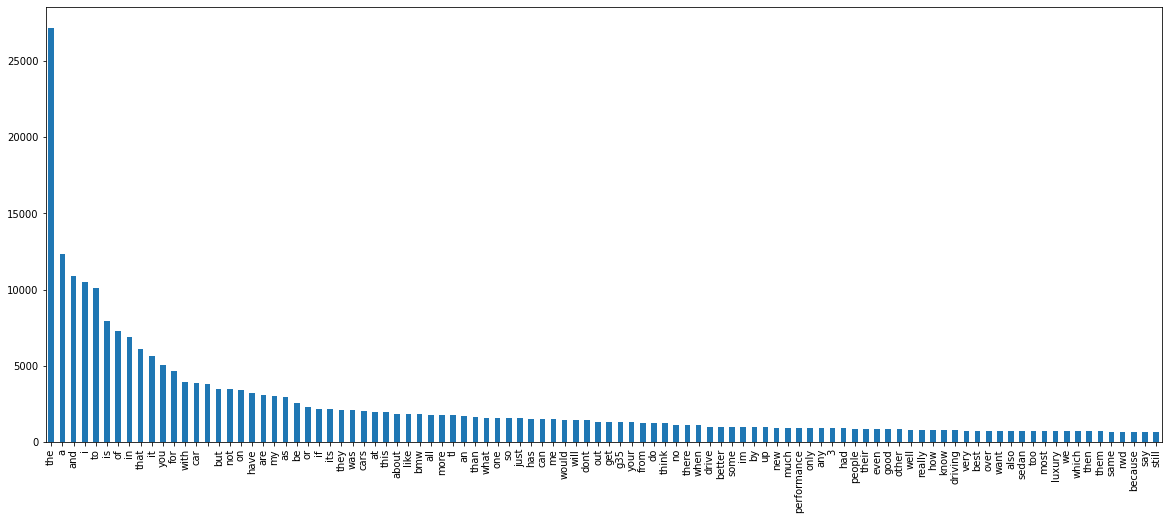

In [15]:
word_ct_sorted={i:j for i,j in sorted(word_count.items(), key=lambda d:d[1],reverse=True)}
pd.Series(word_ct_sorted)[:100].plot(kind='bar',figsize=(20,8))

In [16]:
len(word_count)

22725

In [17]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

# dir(wordnet.synsets('apple')[1])

word_ct_synonyms=[(k,v,len(wordnet.synsets(k)))
 for k,v in word_count.items()]


df_wrd=pd.DataFrame(word_ct_synonyms)
df_wrd.columns=['word','ct','ct_synms']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [18]:
from scipy.stats import rankdata
df_wrd[['rk_ct','rk_synms']]=df_wrd[['ct','ct_synms']].rank(ascending=False)

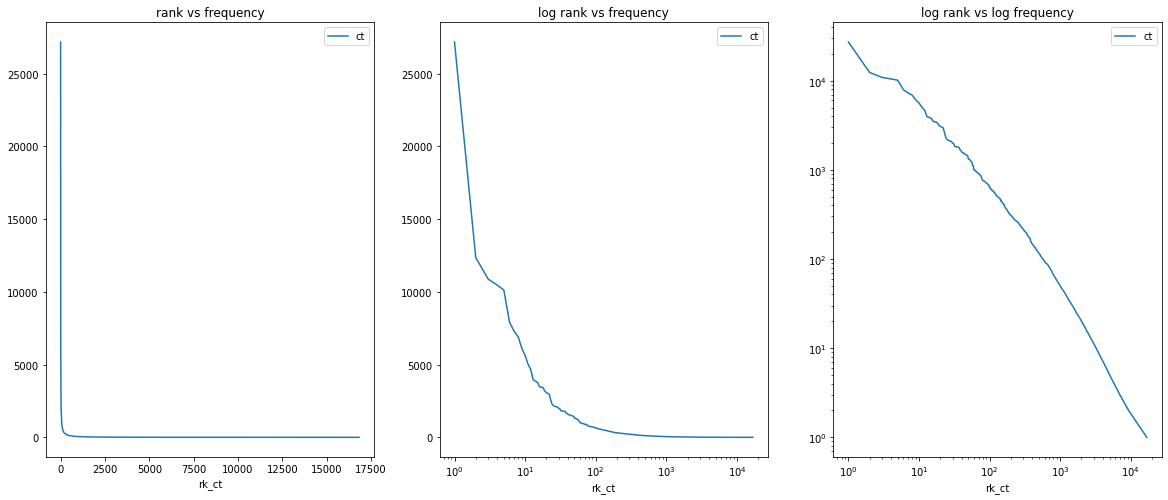

In [19]:
import seaborn as sns

f,ax=plt.subplots(1,3)
df_wrd.sort_values('ct',ascending=False).plot(x='rk_ct',y='ct',figsize=(20,8),ax=ax[0])
df_wrd.sort_values('ct',ascending=False).plot(x='rk_ct',y='ct',figsize=(20,8),ax=ax[1])
df_wrd.sort_values('ct',ascending=False).plot(x='rk_ct',y='ct',figsize=(20,8),ax=ax[2])


ax[0].set_title('rank vs frequency')


ax[1].set_title('log rank vs frequency')
ax[1].set_xscale('log')



ax[2].set_title('log rank vs log frequency')
ax[2].set_xscale('log')
ax[2].set_yscale('log')

# sns.regplot(x='rk_ct',y='ct',data=df_wrd.sort_values('ct',ascending=False))


In [20]:
df_wrd.sort_values(by='ct',ascending=False).iloc[:100].corr()#.sort_values('rk_ct_synms')

,ct,ct_synms,rk_ct,rk_synms
ct,1.000000,-0.173782,-0.626498,0.213916
ct_synms,-0.173782,1.000000,0.186962,-0.705549
rk_ct,-0.626498,0.186962,1.000000,-0.193342
rk_synms,0.213916,-0.705549,-0.193342,1.000000


In [21]:
np.corrcoef(np.log(df_wrd['ct']),np.log(df_wrd['rk_ct']))

array([[ 1.        , -0.99773797],
       [-0.99773797,  1.        ]])

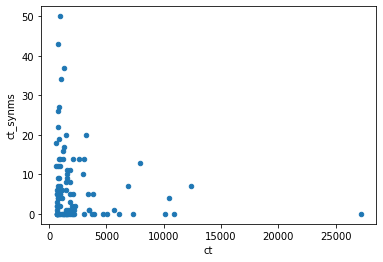

In [22]:
df_wrd.sort_values(by='ct',ascending=False).iloc[:100].plot(x='ct',y='ct_synms',kind='scatter')

# TASK B

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(msg_txt)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# len(msg_txt.split(' '))

without_stop_words=[i for i in word_tokens if i not in stop_words]
len(without_stop_words)

252709

In [25]:
from collections import defaultdict
word_count=defaultdict(int)

ct=0
for w in without_stop_words:
  ct+=1
  word_count[w]+=1

In [33]:
# df_brands=pd.read_csv('../car models and brands.csv')
df_brands=pd.read_csv('car models and brands.csv')


FileNotFoundError: ignored

In [34]:
def process_str(e):
  e=re.sub(r'[^\w\s]','',str(e)).replace('\n\n',' ')
  return e
lt_brands=list(set(df_brands['Brand'].apply(lambda e: process_str(e).lower()).to_list()))


In [35]:
brand_count={i:j for i,j in word_count.items() if i in lt_brands}
brand_count

{'acura': 515,
 'audi': 371,
 'bmw': 1865,
 'buick': 21,
 'cadillac': 116,
 'car': 3892,
 'chevrolet': 4,
 'chrysler': 46,
 'dodge': 28,
 'ford': 86,
 'honda': 227,
 'hyundai': 104,
 'infiniti': 466,
 'kia': 24,
 'lincoln': 67,
 'mazda': 74,
 'mercedes': 169,
 'mercedesbenz': 36,
 'mercury': 7,
 'mitsubishi': 16,
 'nissan': 214,
 'pontiac': 26,
 'problem': 206,
 'saturn': 11,
 'seat': 211,
 'sedan': 732,
 'subaru': 142,
 'suzuki': 10,
 'toyota': 135,
 'volkswagen': 19,
 'volkwagen': 1,
 'volvo': 159}

In [36]:
def process_str(e):
  e=re.sub(r'[^\w\s]','',str(e)).replace('\n\n',' ')
  return e
lt_models=list(set(df_brands['Model'].apply(lambda e: process_str(e).lower()).to_list()))
model_count={i:j for i,j in word_count.items() if i in lt_models}


In [37]:
df_brands.loc[:,'Model']=df_brands['Model'].apply(lambda e: process_str(e).lower())
df_brands.loc[:,'Brand']=df_brands['Brand'].apply(lambda e: process_str(e).lower())

In [38]:
df_brands.loc[:,'ct_model']=df_brands['Model'].map(model_count)

In [39]:
ct_brand_models=df_brands.groupby('Brand')['ct_model'].sum()
ct_brand=pd.Series(brand_count,name='Brand')

In [40]:
df_brand_ct=pd.merge(ct_brand,ct_brand_models,left_index=True,right_index=True)
df_brand_ct.loc[:,'sum_ct']=df_brand_ct.sum(axis=1)
df_brand_ct.sort_values('sum_ct',ascending=False).iloc[:11]

,Brand,ct_model,sum_ct
car,3892,2069.0,5961.0
bmw,1865,1028.0,2893.0
sedan,732,238.0,970.0
audi,371,545.0,916.0
acura,515,377.0,892.0
honda,227,530.0,757.0
toyota,135,439.0,574.0
infiniti,466,101.0,567.0
nissan,214,290.0,504.0
seat,211,201.0,412.0


In [41]:
top_10_brands=df_brand_ct.sort_values('sum_ct',ascending=False).iloc[1:11].index.to_list()

from pprint import pprint
pprint(top_10_brands)

['bmw',
 'sedan',
 'audi',
 'acura',
 'honda',
 'toyota',
 'infiniti',
 'nissan',
 'seat',
 'mercedes']


## TASK C

In [42]:
##Just selecting the message based column to work on
df_messages.loc[:,'message']=df_messages.message.astype(str)
df_messages.reset_index(drop=True,inplace=True)
df=df_messages.loc[:,['message']]
df['message']=df['message'].apply(lambda e: process_str(e).lower())

In [43]:
## We will first replace name of models with brand inside every indivdual message 

brand_models=df_brands.drop(['ct_model'],axis=1).set_index('Model')['Brand']

brand_models.index.name= None
brand_models



integra    acura
legend     acura
vigor      acura
rlx        acura
ilx        acura
           ...  
xc90       volvo
s60        volvo
s80        volvo
v60        volvo
c70        volvo
Name: Brand, Length: 530, dtype: object

In [47]:
def replace_models_with_brand(e):
  s_e=pd.Series(word_tokenize(e))
  s_e=s_e.replace(brand_models)

  modified_text=' '.join(s_e)

  return modified_text

df['message_only_brands']=df.message.apply(lambda e : replace_models_with_brand(e))
# df=pd.read_csv('txt_with_only_brand_names.csv')
df

,message,message_only_brands
0,entry level performance luxury sedans are a ho...,entry level performance luxury sedan are a hot...
1,i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...
2,i am debating a new purchase and these two are...,i am debating a new purchase and these two are...
3,great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...
4,and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...
...,...,...
4995,yea thats an insult to abrams tanks,yea thats an insult to abrams tanks
4996,parking makes me nuts i left my car in my comp...,parking makes me nuts i left my car in my comp...
4997,i feel your paini just noticed a new kink in t...,i feel your paini just noticed a new kink in t...
4998,count me as a turning radius enthusiast in 25 ...,count me as a turning radius enthusiast in 25 ...


In [48]:
df.to_csv('txt_with_only_brand_names.csv')
df['message_only_brands']

0       entry level performance luxury sedan are a hot...
1       i personally think that with a few tweaks the ...
2       i am debating a new purchase and these two are...
3       great handling rwd excellent engine and the be...
4       and no manual tranny that may not matter to yo...
                              ...                        
4995                  yea thats an insult to abrams tanks
4996    parking makes me nuts i left my car in my comp...
4997    i feel your paini just noticed a new kink in t...
4998    count me as a turning radius enthusiast in 25 ...
4999    i am the person that would park in the next po...
Name: message_only_brands, Length: 5000, dtype: object

In [49]:
def ct_brand_presence(e,list_of_brands=lt_brands,only_indicator=True):

  temp=pd.Series(map(e.count,list_of_brands),
          index=list_of_brands)
  
  if only_indicator:
    temp=(temp>0).astype(int)
  return temp

df_brand_cmt=df.message_only_brands.apply(lambda e:ct_brand_presence(e,list_of_brands=top_10_brands))


In [50]:
cols=sorted(df_brand_cmt.columns)
df_lift=pd.DataFrame(index=cols,columns=cols)

total=df_brand_cmt.sum().sum()

for c in cols:
  pair_cols=[i for i in cols if i>c]
  if pair_cols:

    for p_c in pair_cols:
      num=((df_brand_cmt[p_c]*df_brand_cmt[c]).sum())*total
      den=(df_brand_cmt[p_c].sum())*(df_brand_cmt[c].sum())


      df_lift.loc[p_c,c]=num/den

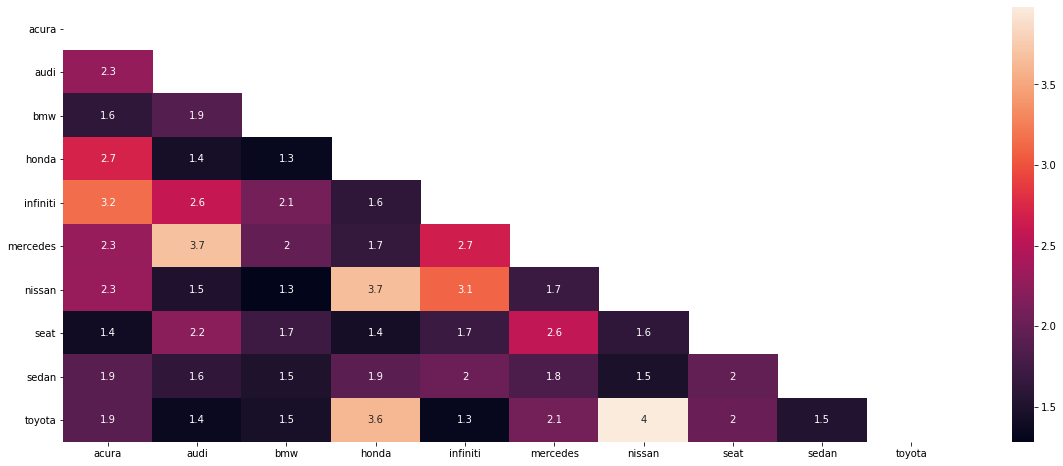

In [51]:
import seaborn as sns
plt.figure(figsize=(20,8))


sns.heatmap(df_lift.fillna(0),
            annot=True,mask=np.triu(df_lift))

In [52]:
# e=df['message'][0]
# s_e=pd.Series(word_tokenize(e))

# s_e.replace(brand_models)

# ' '.join(s_e)
# # brand_models

# word_tokenize(e).count(lt_brands)

# pd.Series(map(e.count,lt_brands),
#           index=lt_brands)

# df_messages.message[0]

In [53]:
# df_messages.message.apply(lambda e: len(set(e.split(' ')))).value_counts().sort_index().plot(kind='bar',figsize=(20,8))
# df.loc[(df.message.apply(lambda e: len(set(e.split(' '))))>3),]


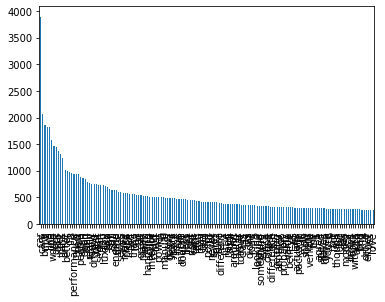

In [54]:
pd.Series(word_count).sort_values(ascending=False).iloc[:150].plot(kind='bar')

## TASK F

In [55]:
nltk.download('averaged_perceptron_tagger')

temp=set(list(i for i,j in nltk.pos_tag(word_count.keys()) if 'nn' in j.lower()))
df_noun=pd.Series({i:j for i,j in word_count.items() if i in temp})

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [56]:
print(*df_noun.sort_values(ascending=False).iloc[:150].index,sep='\t')

car	cars	dont	get	drive	im	performance	people	sedan	luxury	rwd	engine	time	series	way	price	thats	buy	awd	test	power	hp	g	years	ive	infiniti	doesnt	tires	right	point	id	sales	sport	thing	year	torque	class	cts	didnt	road	something	coupe	difference	value	snow	vehicle	mb	tsx	youre	fact	gas	money	auto	guess	top	is300	things	vs	numbers	reliability	others	front	miles	come	anything	brand	nothing	ride	sedans	regards	sports	system	course	anyone	honda	bit	vehicles	opinion	accord	xtype	quality	driver	experience	transmission	mileage	m3	mpg	seat	thought	line	level	saab	problem	day	cost	world	post	seats	dealer	v6	drivers	market	model	thanks	comparison	reason	times	entry	track	winter	theres	worth	discussion	wheel	choice	size	work	someone	cd	problems	features	tell	pay	everything	mercedes	suspension	acceleration	list	volvo	matter	standard	g35x	steer	issue	lets	try	mind	everyone	msrp	design	compare	fuel	category	premium	subaru	engines	number	is350	deal	owners


In [57]:
'engine','price','performance','luxury','power','tires',

('engine', 'price', 'performance', 'power', 'tires')

In [64]:
lt_attrs=['engine','price','performance','luxury','power','tires']
top_10_brands_attrs=top_10_brands+lt_attrs
df_brand_attr=df.message_only_brands.apply(lambda e:ct_brand_presence(e,list_of_brands=top_10_brands_attrs))



In [68]:
cols=sorted(df_brand_attr.columns)
df_lift_BrAttr=pd.DataFrame(index=cols,columns=cols)

total=df_brand_attr.sum().sum()

for c in cols:
  pair_cols=[i for i in cols if i>c]
  if pair_cols:

    for p_c in pair_cols:
      num=((df_brand_attr[p_c]*df_brand_attr[c]).sum())*total
      den=(df_brand_attr[p_c].sum())*(df_brand_attr[c].sum())


      df_lift_BrAttr.loc[p_c,c]=num/den
      df_lift_BrAttr.loc[c,p_c]=num/den

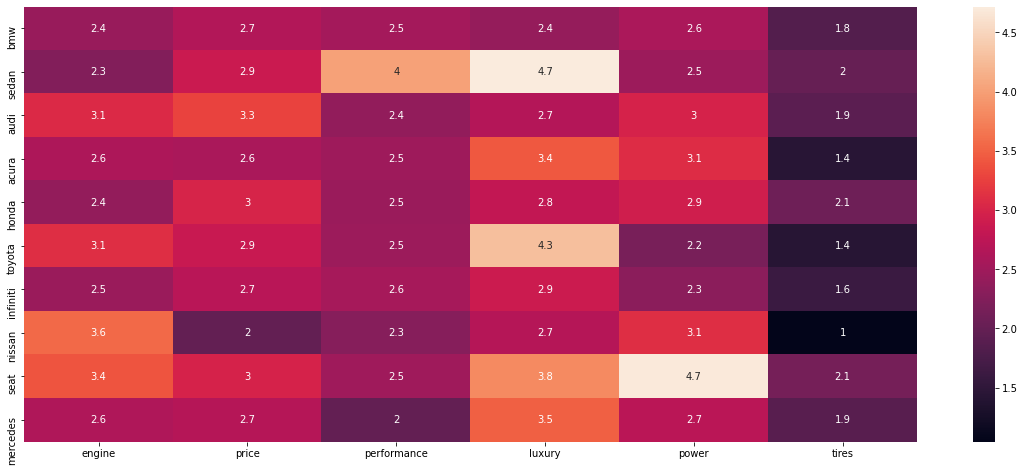

In [76]:
plt.figure(figsize=(20,8))

sns.heatmap(df_lift_BrAttr.loc[top_10_brands,lt_attrs].astype(float),annot=True)

## TASK H 

In [107]:
lt_asp_wrds=['dream of', 'dream to', 'love to','dream','love','want']

#temp=df.message_only_brands[0]
# temp.count('are a')
# temp.replace('are a|alike these', '#####')

In [105]:
df.message_only_brands.iloc[:10].str.replace('are a|entry level','#####')

pattern='|'.join(lt_asp_wrds)

df['msg_aspire']=df.message_only_brands.str.replace(pattern,'aspire')


In [109]:
# df[df.message_only_brands.apply(lambda e : e.count('want to')>1)]
# df_brand_cmt=
df_aspr=df.msg_aspire.apply(lambda e:ct_brand_presence(e,list_of_brands=top_10_brands+['aspire']))




In [115]:
total=df_aspr.sum().sum()

df_aspire_lift=pd.Series(index=df_aspr.columns)

for c in df_aspr.columns:
  if c=='aspire':
    print('hi')
    continue

  num=(sum((df_aspr[c])*(df_aspr['aspire'])))*total
  den=(df_aspr[c].sum()*df_aspr['aspire'].sum())

  df_aspire_lift.loc[c]=(num/den)





hi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
df_aspire_lift

bmw         1.874773
sedan       1.925721
audi        1.851047
acura       1.774170
honda       1.927734
toyota      1.699377
infiniti    1.998305
nissan      1.815243
seat        2.436733
mercedes    1.620565
aspire           NaN
dtype: float64

0
1
2
4
